Correlation and Regression of the compositionality values reported in Reddy et. al. and the cosine similarities extracted from the Google Ngram data. Values are only based on the compound-aware measures.

# Import


In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set(style="whitegrid")
#sns.set(rc={'figure.figsize':(10,10)})
import matplotlib
#matplotlib.use('agg')
#matplotlib.style.use('ggplot')
import pickle as pkl
from matplotlib import pyplot as plt
from scipy.stats.stats import pearsonr
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en import LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES
lemmatizer = Lemmatizer(LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES)

# Helper Functions

In [7]:
def lemma_maker(x, y):
    #print(lemmatizer(x,y)[0])
    return lemmatizer(x,y)[0]

In [8]:
br_to_us=pd.read_excel("Book.xlsx",skiprows=[0])
br_to_us_dict=dict(zip(br_to_us.UK.tolist(),br_to_us.US.tolist()))
spelling_replacement={'modifier':br_to_us_dict,'head':br_to_us_dict}

# Load the datasets

## Load Google data

In [9]:
data = pd.read_csv("/data/dharp/compounding/datasets/features_non_temporal.csv", sep = "\t")
data.set_index(["modifier", "head"], inplace = True)
data.head()

sim_bw_constituents  sim_with_head  sim_with_modifier  \
modifier head                                                                   
a_noun   anti_noun                 0.005904       0.010601           0.556861   
         archive_noun              0.000249       0.009896           0.012212   
         atom_noun                 0.015145       0.167297           0.076582   
         b_noun                    0.209151       0.316079           0.499708   
         bachelor_noun             0.000196       0.013255           0.002183   

                           log_ratio      ppmi  local_mi  
modifier head                                             
a_noun   anti_noun      3.139531e-07  0.073731  0.000663  
         archive_noun   8.500849e-07  0.093468  0.000664  
         atom_noun      6.819428e-09  0.000000  0.000662  
         b_noun         2.399689e-04  0.259751  0.001010  
         bachelor_noun  1.200870e-05  0.355049  0.000678

## Load Reddy data

In [10]:
reddy11_study=pd.read_csv("/data/dharp/compounding/datasets/ijcnlp_compositionality_data/MeanAndDeviations.clean.txt",sep="\t")
#print(reddy11_study.columns)
reddy11_study.columns=['compound','to_divide']
reddy11_study['modifier_mean'],reddy11_study['modifier_std'],reddy11_study['head_mean'],reddy11_study['head_std'],reddy11_study['compound_mean'],reddy11_study['compound_std'],_=reddy11_study.to_divide.str.split(" ",7).str
reddy11_study['modifier'],reddy11_study['head']=reddy11_study['compound'].str.split(" ",2).str
reddy11_study.modifier=reddy11_study.modifier.str[:-2]
reddy11_study['head']=reddy11_study['head'].str[:-2]
reddy11_study.drop(['compound','to_divide'],axis=1,inplace=True)
reddy11_study['modifier']=np.vectorize(lemma_maker)(reddy11_study['modifier'],'noun')
reddy11_study['head']=np.vectorize(lemma_maker)(reddy11_study['head'],'noun')
reddy11_study.replace(spelling_replacement,inplace=True)
reddy11_study['modifier']=reddy11_study['modifier']+"_noun"
reddy11_study['head']=reddy11_study['head']+"_noun"
reddy11_study=reddy11_study.apply(pd.to_numeric, errors='ignore')
#reddy11_study.set_index(['modifier','head'],inplace=True)
reddy11_study.head()

,modifier_mean,modifier_std,head_mean,head_std,compound_mean,compound_std,modifier,head
0,3.866667,1.117537,4.866667,0.339935,4.250000,0.871165,end_noun,user_noun
1,1.607143,1.654848,1.892857,1.496169,1.703704,1.717337,firing_noun,line_noun
2,2.821429,1.964935,4.862069,0.344828,3.827586,1.233693,game_noun,plan_noun
3,4.766667,0.422953,4.862069,0.344828,4.800000,0.476095,application_noun,form_noun
4,0.600000,0.800000,4.586207,1.099129,1.310345,1.020596,snail_noun,mail_noun


# Merge Google and Reddy

In [11]:
merge_df=reddy11_study.merge(data.reset_index(),on=['modifier','head'],how='inner')
merge_df.set_index(["modifier", "head"], inplace = True)
merge_df.head()

,,modifier_mean,modifier_std,head_mean,head_std,compound_mean,compound_std,sim_bw_constituents,sim_with_head,sim_with_modifier,log_ratio,ppmi,local_mi
modifier,head,,,,,,,,,,,,
end_noun,user_noun,3.866667,1.117537,4.866667,0.339935,4.250000,0.871165,0.156226,0.260108,0.495606,0.001657,0.317920,0.002906
firing_noun,line_noun,1.607143,1.654848,1.892857,1.496169,1.703704,1.717337,0.031825,0.112967,0.029479,0.000013,0.145077,0.000684
game_noun,plan_noun,2.821429,1.964935,4.862069,0.344828,3.827586,1.233693,0.152545,0.408596,0.222184,0.000170,0.210625,0.000925
application_noun,form_noun,4.766667,0.422953,4.862069,0.344828,4.800000,0.476095,0.223874,0.322376,0.339615,0.000896,0.302652,0.001897
web_noun,site_noun,2.678571,1.691440,3.933333,1.181336,3.785714,1.205853,0.041542,0.191957,0.200807,0.020445,0.360154,0.025239


In [13]:
merge_df.to_csv('CompoundAware_DecadeAgnostic.csv',sep='\t')

# Correlation

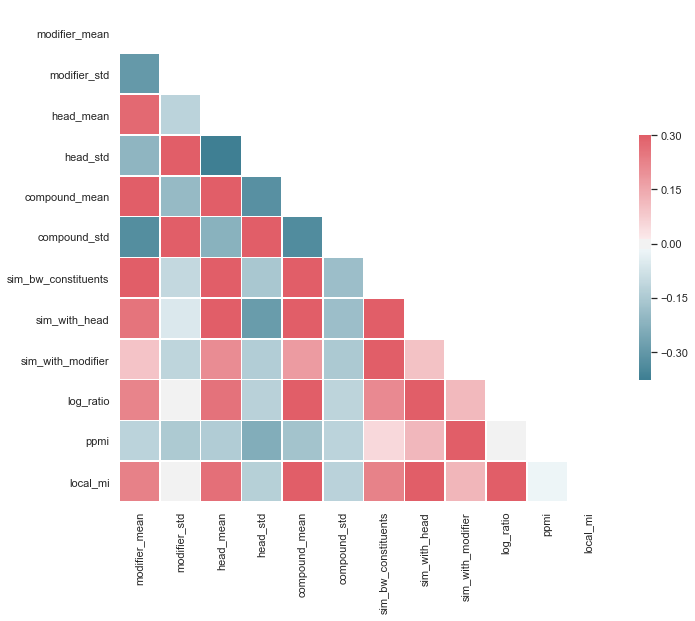

In [26]:
corr=merge_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Variables

- Reddy
   - modifier_mean
   - modifier_std
   - head_mean
   - head_std
   - compound_mean
   - compound_std
- Our Sims
   - sim_bw_constituents
   - sim_with_head
   - sim_with_modifier
   - log_ratio
   - ppmi
   - local_mi

### Observations

We are able to observe that the Reddy scores and the similarities are correlated (to a certain extend). Despite the correlation score never going over 0.3, the critical variables are always positively correlated with a value of above 0.15. Interesting cells are for example [compound_mean - sim_bw_constituents], [compound_mean - sim_with_head], [modifier_mean - sim_with_modifier] or [head_mean - sim_with_head]
   
### Questions:

- Why is PPMI always negatively correlated with all the Reddy scores?
- Why is sim_with_modifier much less correlated to the Reddy mean scores compared to head and constiuents?

# Regression

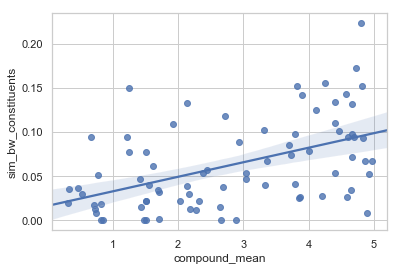

In [30]:
ax = sns.regplot(x="compound_mean", y="sim_bw_constituents", data=merge_df)

Really nice strong regression between compound_mean and sim_bw_constituents, what we would like to see

/home/users0/pageljs/arbeitsdaten35/build/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


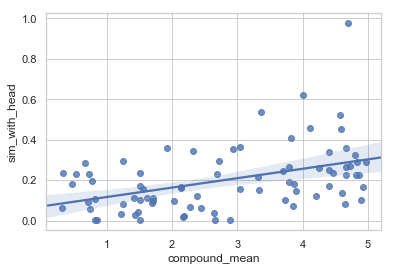

In [27]:
ax = sns.regplot(x="compound_mean", y="sim_with_head", data=merge_df)

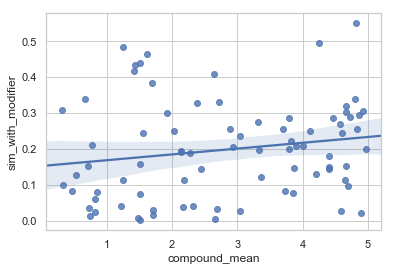

In [29]:
ax = sns.regplot(x="compound_mean", y="sim_with_modifier", data=merge_df)

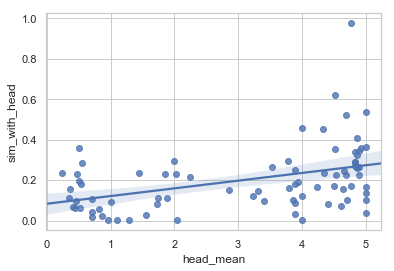

In [31]:
ax = sns.regplot(x="head_mean", y="sim_with_head", data=merge_df)

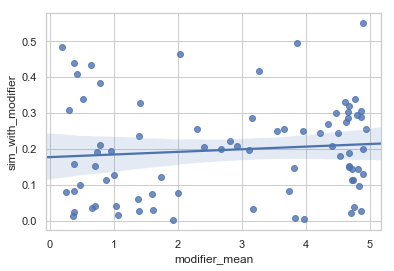

In [35]:
ax = sns.regplot(x="modifier_mean", y="sim_with_modifier", data=merge_df)

Once again, the modifier sims seem to be less accociated with the Reddy scores